# HMM - stock price synth series

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from scipy import stats


In [12]:
# Download historical data for S&P 500
sp500 = yf.download('^GSPC', start='1999-01-01', end='2022-02-26')

C:\Users\Lang_\AppData\Local\Temp\ipykernel_16800\754996789.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='1999-01-01', end='2022-02-26')
[*********************100%***********************]  1 of 1 completed


In [13]:
# Convert data to daily returns
sp500_returns = sp500['Close'].pct_change().dropna()

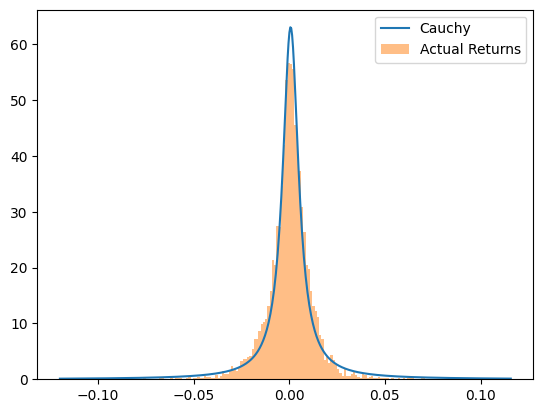

In [20]:

# Explore different distribution assumptions

distributions = [

    # ('Normal', stats.norm),

    # ('Student-t', stats.t),

    ('Cauchy', stats.cauchy)#,

    # ('Laplace', stats.laplace)#,

    # ('Log-Normal', stats.lognorm)

]

 

for name, dist in distributions:

    params = dist.fit(sp500_returns)

    x = np.linspace(sp500_returns.min(), sp500_returns.max(), 500)

    y = dist.pdf(x, *params)

    plt.plot(x, y, label=name)

# Add actual sp500 returns distribution
plt.hist(sp500_returns, bins=200, density=True, alpha=0.5, label='Actual Returns')

plt.legend(loc='best')
plt.show()

In [22]:
# Train gaussian HMM


# Define the parameter grid for the grid search

param_grid = {

    'n_components': [2, 3, 4, 5],

    'covariance_type': ['spherical', 'diagonal', 'full']

}

 

# Initialize the Gaussian HMM

hmm = GaussianHMM(n_iter=1000)

 

 

In [ ]:
# Perform the grid search
grid_search = GridSearchCV(hmm, param_grid, cv=3, scoring='neg_log_loss')

grid_search.fit(sp500_returns.values.reshape(-1, 1))

Model is not converging.  Current: 12459.436631094235 is not greater than 12459.60009002667. Delta is -0.16345893243487808
c:\Users\Lang_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lang_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Lang_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most r

,estimator,GaussianHMM(n_iter=1000)
,param_grid,"{'covariance_type': ['spherical', 'diagonal', ...], 'n_components': [2, 3, ...]}"
,scoring,'neg_log_loss'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_components,2


In [27]:

# Fit the optimal Gaussian HMM to the data

optimal_hmm = GaussianHMM(n_components=grid_search.best_params_['n_components'],

                          covariance_type=grid_search.best_params_['covariance_type'],

                          n_iter=1000)

optimal_hmm.fit(sp500_returns.values.reshape(-1, 1))


,n_components,2
,covariance_type,'spherical'
,min_covar,0.001
,startprob_prior,1.0
,transmat_prior,1.0
,means_prior,0
,means_weight,0
,covars_prior,0.01
,covars_weight,1
,algorithm,'viterbi'
,random_state,None


In [ ]:

# Generate 100 scenarios using the optimal HMM

np.random.seed(0)

scenarios = []

for _ in range(100):

    # Sample a sequence of hidden states
    hidden_states = optimal_hmm.sample(252)[1]

    # Generate a sequence of observations
    observations = optimal_hmm.sample(252)[0].flatten()

    # Calculate the cumulative product to get the price series
    price_series = np.cumprod(1 + observations) * sp500['Close'][-1]

    scenarios.append(price_series)

 

# Plot the scenarios

plt.figure(figsize=(12, 6))

for scenario in scenarios:

    plt.plot(scenario)

plt.plot(sp500['Close'], label='S&P 500', color='black', linewidth=2)

plt.legend()

plt.show()


KeyError: -1

In [31]:
sp500['Close']

Ticker,^GSPC
Date,
1999-01-04,1228.099976
1999-01-05,1244.780029
1999-01-06,1272.339966
1999-01-07,1269.729980
1999-01-08,1275.089966
...,...
2022-02-18,4348.870117
2022-02-22,4304.759766
2022-02-23,4225.500000
